In [1]:
import matplotlib.pyplot as plt

In [2]:
def update(t, delta_t, current_val, f_prime):
    return current_val + (delta_t * f_prime(current_val))

In [3]:
#define derivatives
def s_dot(beta, I, N):
    return lambda S : -1 * beta * S * I * (1 / N)

def i_dot(beta, gamma, S, N):
    return lambda I : (beta * S * I * (1 / N)) - (gamma * I)

def r_dot(gamma, I):
    return lambda _ : gamma * I

In [18]:
#create solver
def solve(init_conditions, N, delta_t, max_time, beta, gamma):
    #set up experiment loop
    t = [init_conditions[0]]
    S =[init_conditions[1]]
    I = [init_conditions[2]]
    R = [init_conditions[3]]
    
    idx=0
    
    while t[idx] < max_time:
        #create derivatives
        s_update = s_dot(beta, I[idx], N)
        i_update = i_dot(beta, gamma, S[idx], N)
        r_update = r_dot(gamma, I[idx])
        
        #update S, I, R
        S.append(update(t[idx], delta_t, S[idx], s_update))
        I.append(update(t[idx], delta_t, I[idx], i_update))
        R.append(update(t[idx], delta_t, R[idx], r_update))
    
        #upate time
        t.append(t[idx] + delta_t)
        idx += 1

    return t, S, I, R

## Problem 1

In [24]:
#create plotting function
def plot(S, I, R, beta, gamma, t, save=True, N=1000, loc='right'):
    plt.plot(t, S, color='blue', label='S Morgan')
    plt.plot(t, I, color='red', label='I Morgan')
    plt.plot(t, R, color='black', label='R Morgan')
    
    plt.xlabel('Time')
    plt.ylabel('People')

    plt.xlim([0,t[-1]])
    plt.ylim([0,N+50])
    
    plt.title(rf'SIR model outputs for $\beta = {beta}$, $\gamma = {gamma}$')
    plt.legend(loc=loc)

    if save:
        plt.savefig(f'sir_beta={beta}_gamma={gamma}.jpg', dpi=200, bbox_inches='tight')
    plt.show()

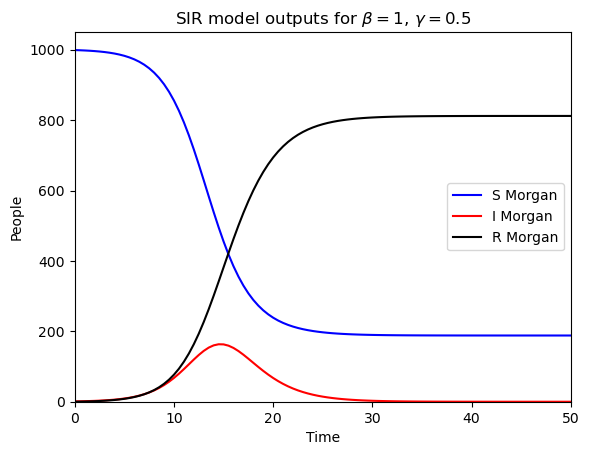

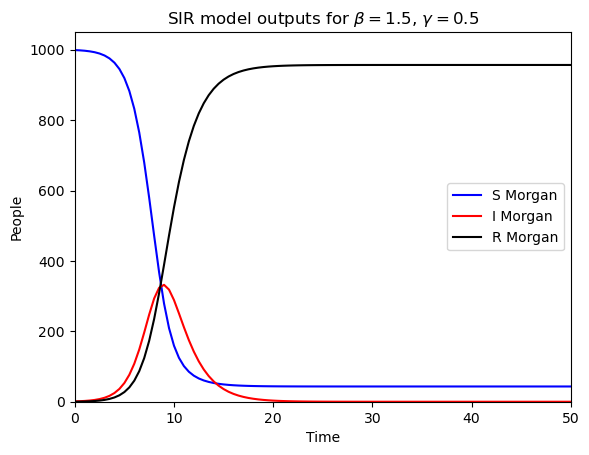

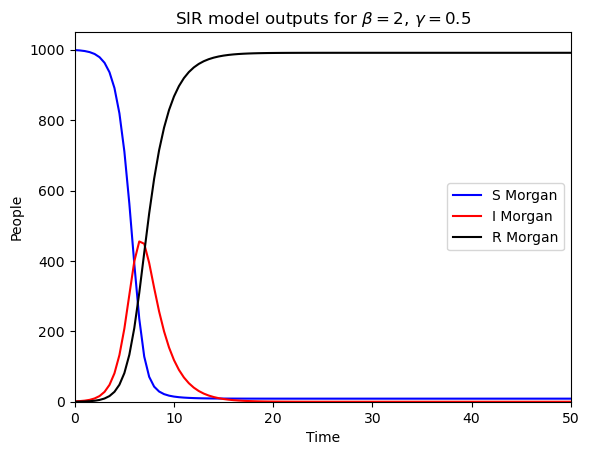

In [19]:
#initial conditions
t_init = 0
delta_t = 0.5
max_time = 50

N = 1000
S_init = 999
I_init = 1
R_init = N - I_init - S_init

init_conditions = [t_init, S_init, I_init, R_init]

#solve loop
betas = [1, 1.5, 2]
gamma = 0.5

for beta in betas:
    t, S, I, R = solve(init_conditions, N, delta_t, max_time, beta, gamma)
    plot(S,I,R, beta, gamma, t, N=N, save=False)

## Problem 4

10000000.0 2500000.0 1.0000001 7499998.999999899


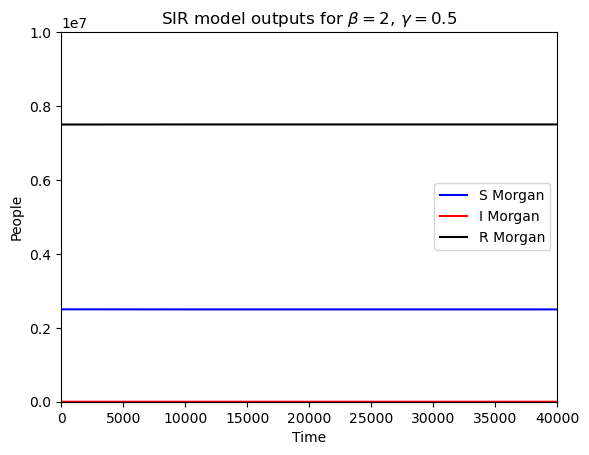

In [34]:
#initial conditions for question 4
t_init = 0
delta_t = 0.5
max_time = 40000

N = 10e6
epsilon = 1 / N
S_init = N * (gamma / beta)
I_init = 1 + epsilon
R_init = N - I_init - S_init

init_conditions = [t_init, S_init, I_init, R_init]
print(N, S_init, I_init, R_init)

#solve
t, S, I, R = solve(init_conditions, N, delta_t, max_time, beta, gamma)
plot(S,I,R, beta, gamma, t, N=N, save=False)

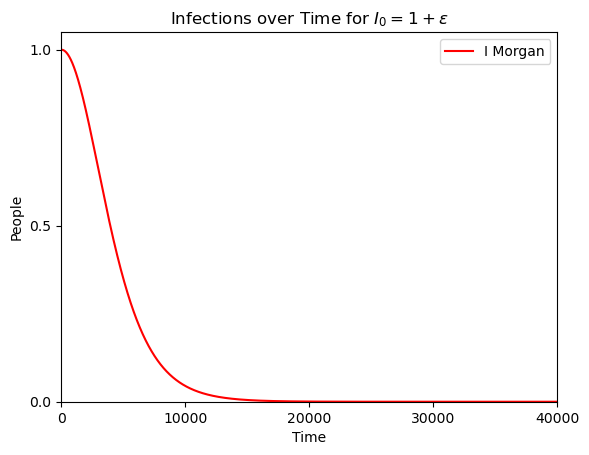

In [53]:
#plotting only I
plt.plot(t, I, color='red', label='I Morgan')

plt.xlim([0, t[-1]])
plt.ylim([0, I[0] + 0.05])

plt.xlabel('Time')
plt.ylabel('People')

plt.xticks([i for i in range(0, max_time + 1, 10000)])
plt.yticks([0, 0.5, 1])

plt.title(r'Infections over Time for $I_0 = 1 + \epsilon$')
plt.legend(loc='best')

plt.savefig('i_stability.jpg', dpi=200, bbox_inches='tight')
plt.show()